# Visualise Data

The purpose of this notebook is to visualise important aspects of the data.

## Assignment

- What insights can you provide the business based on the data?
- Please describe the process and tools that you utilized to ‘clean’ and analyze the data.
- Are there customer variables that are closely related to renewals or churn? 
- How would you communicate your findings to a business stakeholder responsible for driving retention?
- How would you visualize this data in a concise, easily consumable format?  Feel free to provide example view.
- Would you make a recommendation to the business based on this info?
- What additional information would you look for in order to expand your analysis?
- Any other items you would want to add?

## Questions to Answer

- How many new clients did we gain/lose every year?
- What share of our income comes from high usage clients? 
- Who are our most valuable clients? 
- How important is loyalty: revenue vs years active
- What are our most valuable markets?
- Where are our most valuable countries?
- When do we make the most during the year?
- How does usage differ between churners/renewers?

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/cleaned_data.csv')

In [3]:
renew = df.loc[df.Renew_Status == 'RENEW']
churn = df.loc[df.Renew_Status == 'CHURN']

total = len(df)

print("Total RENEW: {} [{:.3f}%]".format(len(renew), (len(renew) / total * 100.0)))
print("Total CHURN: {} [{:.3f}%]".format(len(churn), (len(churn) / total * 100.0)))

Total RENEW: 46718 [81.109%]
Total CHURN: 10881 [18.891%]


In [55]:
df.groupby('first_purchase_year').nunique()

,userid,first_purchase_date,renewal_date,renewal_amount_due_usd,licenses,assigned_licenses,market,billing_country,billing_state,channel,...,total_participants,webcam_duration,audio_duration,Renew_Status,first_purchase_year,first_purchase_month,renewal_month,renewal_year,years_active,renewal_amount_due_usd_per_license
first_purchase_year,,,,,,,,,,,,,,,,,,,,,
2010.0,2789,221,138,1690,182,183,3,36,75,2,...,514,659,2319,2,1,12,5,1,1,1421
2011.0,1125,216,132,694,96,113,3,29,95,2,...,261,313,919,2,1,12,5,1,1,509
2012.0,3074,328,138,1190,119,139,3,52,148,2,...,333,639,2119,2,1,12,5,1,1,876
2013.0,11134,365,138,1305,99,115,3,80,299,2,...,283,883,4053,2,1,12,5,1,1,989
2014.0,8722,363,138,1268,115,124,3,89,337,2,...,310,844,3520,2,1,12,5,1,1,969
2015.0,7098,347,138,1165,90,105,3,87,334,2,...,275,812,3053,2,1,12,5,1,1,872
2016.0,9178,345,138,1191,98,109,3,95,479,2,...,293,918,3445,2,1,12,5,1,1,877
2017.0,14063,225,138,949,75,81,3,106,574,2,...,255,1041,4165,2,1,12,5,1,1,690
2018.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [60]:
years

[2016.0, 2017.0, 2018.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]

In [61]:
df.iloc[0]

userid                                    605751
first_purchase_date                   2015-06-25
renewal_date                          2018-06-26
renewal_amount_due_usd                      4800
licenses                                      20
assigned_licenses                             52
market                                       ROW
billing_country                               US
billing_state                                 IN
channel                                  offline
total_meetings_30days                        620
total_meetings_30to60days                    364
meetingdays                                   31
total_participants                           386
webcam_duration                              368
audio_duration                           52220.5
Renew_Status                               RENEW
first_purchase_year                         2015
first_purchase_month                           6
renewal_month                                  6
renewal_year        

In [33]:
df.count()

userid                                57599
first_purchase_date                   57597
renewal_date                          57599
renewal_amount_due_usd                57599
licenses                              57599
assigned_licenses                     57599
market                                54724
billing_country                       53839
billing_state                         45518
channel                               57599
total_meetings_30days                 57599
total_meetings_30to60days             57599
meetingdays                           57599
total_participants                    40526
webcam_duration                       40351
audio_duration                        57599
Renew_Status                          57599
first_purchase_year                   57597
first_purchase_month                  57597
renewal_month                         57599
renewal_year                          57599
years_active                          57597
renewal_amount_due_usd_per_licen

In [27]:
sum(df.head().licenses)

1333

# Visualise Customers

In [165]:
years, users, online, offline, eng_emea, non_eng_emea, row, licenses, revenue = [],[],[],[],[],[],[],[],[]

for yr in list(set(df.dropna(subset=['first_purchase_year']).first_purchase_year)):

    yr_df = df.loc[df.first_purchase_year == yr]
    online_df = yr_df.loc[yr_df.channel == 'online']
    offline_df = yr_df.loc[yr_df.channel == 'offline']
    eng_emea_df = yr_df.loc[yr_df.market == 'ENG EMEA']
    non_eng_emea_df = yr_df.loc[yr_df.market == 'NON ENG EMEA']
    row_df = yr_df.loc[yr_df.market == 'ROW']
    
    years.append(int(yr))
    online.append(len(online_df))
    offline.append(len(offline_df))
    eng_emea.append(len(eng_emea_df))
    non_eng_emea.append(len(non_eng_emea_df))
    row.append(len(row_df))
    licenses.append(sum(yr_df.licenses))
    users.append(len(yr_df))
    revenue.append(sum(yr_df.renewal_amount_due_usd))
    
count_df = pd.DataFrame({
    'year': years,
    'users': users,
    'online': online,
    'offline': offline,
    'eng_emea': eng_emea,
    'non_eng_emea': non_eng_emea,
    'row': row,
    'licenses': licenses,
    'revenue': revenue
})

count_df = count_df.sort_values(by='year')
count_df = count_df.set_index('year')

In [166]:
count_df

,users,online,offline,eng_emea,non_eng_emea,row,licenses,revenue
year,,,,,,,,
2010,2801,23,2778,368,4,2429,104683,25319411.0
2011,1129,126,1003,291,2,836,17941,5806994.0
2012,3093,936,2157,776,20,2288,34915,10611564.0
2013,11206,9241,1965,1204,121,9797,38434,12505346.0
2014,8802,6535,2267,1144,118,7486,36827,10745945.0
2015,7150,5042,2108,1408,112,5601,27843,8846337.0
2016,9230,6880,2350,1699,190,7272,33291,9738652.0
2017,14185,12091,2094,2763,305,8487,29999,9008577.0
2018,1,0,1,0,0,1,1,348.0


In [168]:
count_df['revenue_per_license'] = count_df.apply(lambda row: row['revenue']/ row['licenses'], axis=1)

In [169]:
count_df['revenue_per_customer'] = count_df.apply(lambda row: row['revenue']/ row['users'], axis=1)

In [172]:
count_df['licenses_per_customer'] = count_df.apply(lambda row: row['licenses']/ row['users'], axis=1)

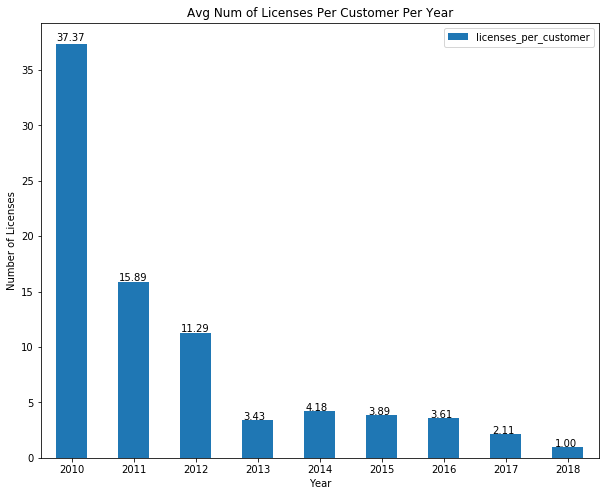

In [176]:
ax = count_df[['licenses_per_customer']].plot.bar(
    figsize=(10,8),
    title='Avg Num of Licenses Per Customer Per Year',
    rot=0
)

ax.set_ylabel("Number of Licenses")
ax.set_xlabel("Year", ro)

for p, percent in zip(ax.patches, list(count_df.licenses_per_customer)):
    ax.annotate("{:.2f}".format(percent), (p.get_x() * 1.005, p.get_height() * 1.008))

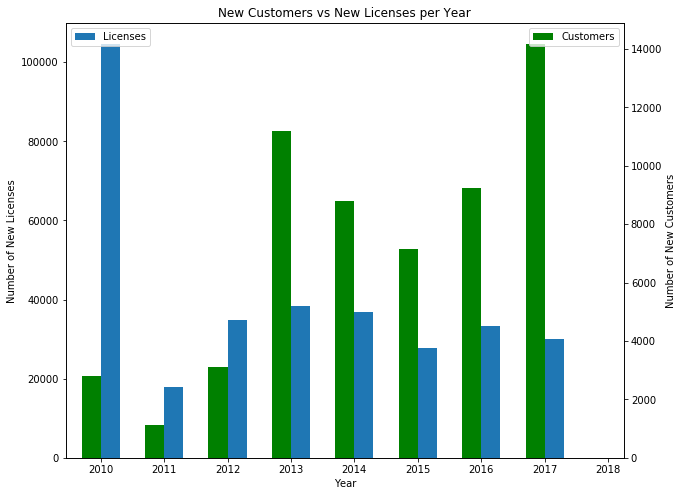

In [202]:
fig = plt.figure(figsize=(10,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

df1 = count_df[['licenses']]
df1.columns = ['Licenses']

df2 = count_df[['users']]
df2.columns = ['Customers']

df1.plot.bar(ax=ax, position=0, label='Licenses', width=width)
df2.plot.bar(color='green',ax=ax2, position=1, label='Customers', width=width)

ax.set_ylabel('Number of New Licenses')
ax2.set_ylabel('Number of New Customers')
ax.set_xticklabels(list(count_df.index), rotation=0)
ax.set_xlabel("Year")
ax.set_title('New Customers vs New Licenses per Year')
ax.legend( loc=2)
ax2.legend(loc=1)

plt.show()


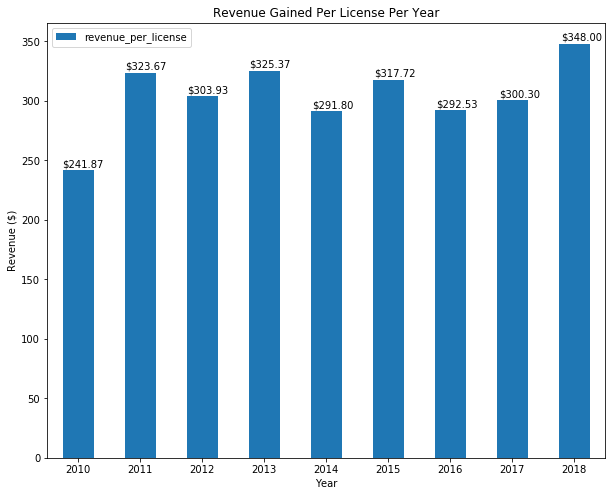

In [170]:
ax = count_df[['revenue_per_license']].plot.bar(
    figsize=(10,8),
    title='Revenue Gained Per License Per Year',
    rot=0
)

ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Year")

for p, percent in zip(ax.patches, list(count_df.revenue_per_license)):
    ax.annotate("${:.2f}".format(percent), (p.get_x() * 1.005, p.get_height() * 1.008))

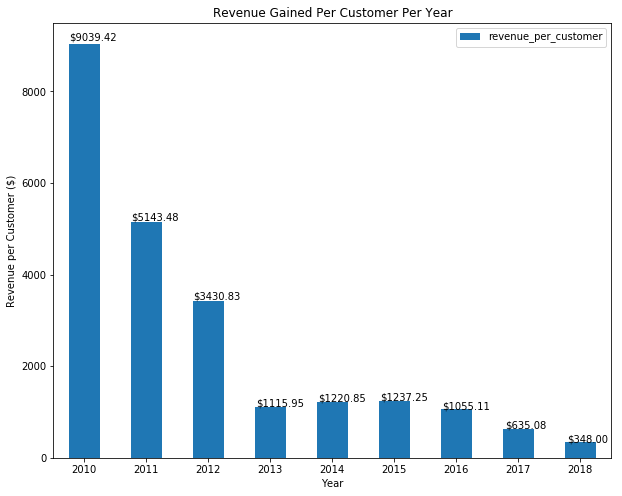

In [171]:
ax = count_df[['revenue_per_customer']].plot.bar(
    figsize=(10,8),
    title='Revenue Gained Per Customer Per Year',
    rot=0
)

ax.set_ylabel("Revenue per Customer ($)")
ax.set_xlabel("Year")

for p, percent in zip(ax.patches, list(count_df.revenue_per_customer)):
    ax.annotate("${:.2f}".format(percent), (p.get_x() * 1.005, p.get_height() * 1.008))

In [164]:
count_df

,users,online,offline,eng_emea,non_eng_emea,row,licenses,revenue,revenue_per_license,revenue_per_customer
year,,,,,,,,,,
2010,2801,23,2778,368,4,2429,104683,1.353663e+06,12.931072,483.278614
2011,1129,126,1003,291,2,836,17941,4.942428e+05,27.548233,437.770454
2012,3093,936,2157,776,20,2288,34915,1.314365e+06,37.644715,424.948338
2013,11206,9241,1965,1204,121,9797,38434,4.365556e+06,113.585776,389.573060
2014,8802,6535,2267,1144,118,7486,36827,3.397249e+06,92.248867,385.963306
2015,7150,5042,2108,1408,112,5601,27843,2.904009e+06,104.299425,406.155089
2016,9230,6880,2350,1699,190,7272,33291,3.343738e+06,100.439688,362.268434
2017,14185,12091,2094,2763,305,8487,29999,4.610300e+06,153.681785,325.012328
2018,1,0,1,0,0,1,1,3.480000e+02,348.000000,348.000000


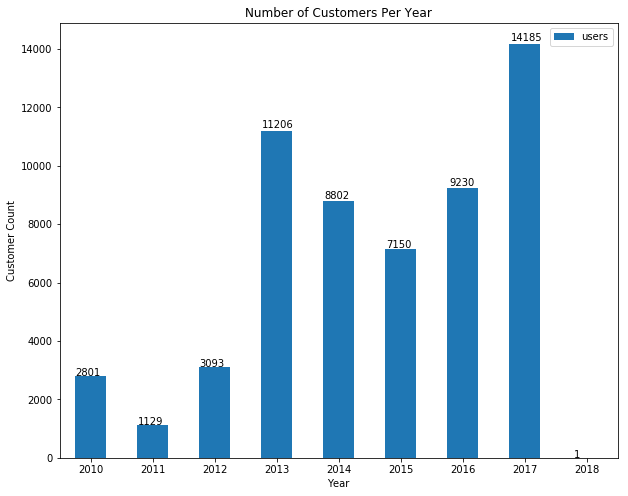

In [159]:
ax = count_df[['users']].plot.bar(
    figsize=(10,8),
    title='Number of Customers Per Year',
    rot=0
)

ax.set_ylabel("Customer Count")
ax.set_xlabel("Year")

for p, percent in zip(ax.patches, list(count_df.users)):
    ax.annotate("{}".format(percent), (p.get_x() * 1.005, p.get_height() * 1.008))

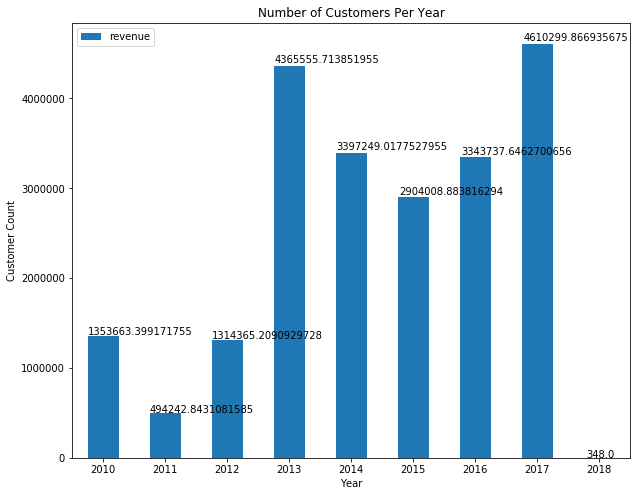

In [160]:
ax = count_df[['revenue']].plot.bar(
    figsize=(10,8),
    title='Number of Customers Per Year',
    rot=0
)

ax.set_ylabel("Customer Count")
ax.set_xlabel("Year")

for p, percent in zip(ax.patches, list(count_df.revenue)):
    ax.annotate("{}".format(percent), (p.get_x() * 1.005, p.get_height() * 1.008))

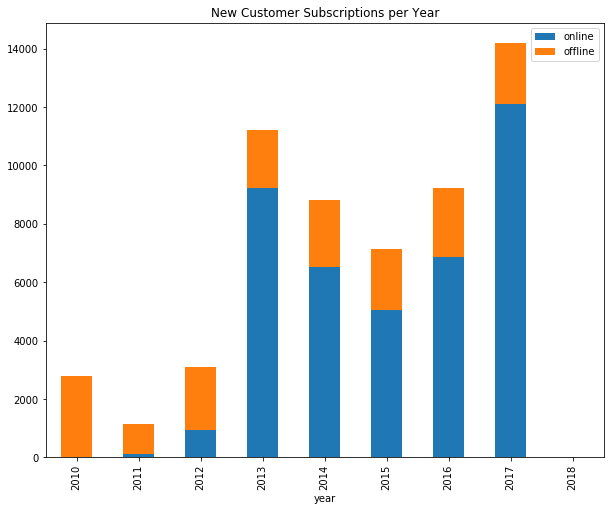

In [45]:
ax = count_df[['online', 'offline']].plot.bar(
    stacked=True, 
    figsize=(10,8),
    title='New Customer Subscriptions per Year'
)

# for p, yr in zip(ax.patches, list(count_df.index)):
#     row = count_df.loc[yr]
#     ct = row['online'] + row['offline']
#     ax.annotate("{}".format(ct), (p.get_x() * 1.005, p.get_height() * 1.005))

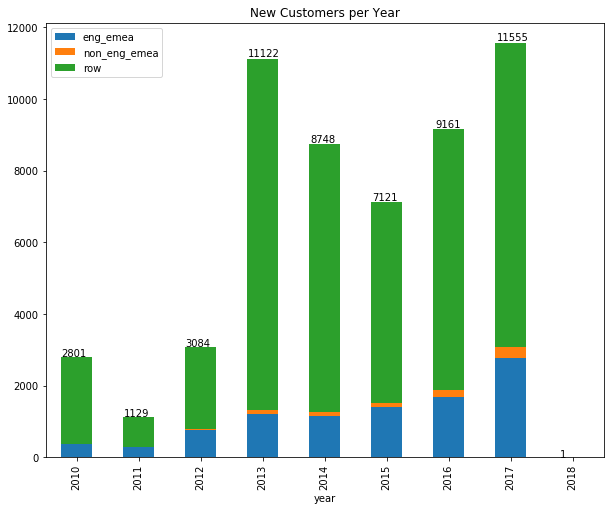

In [88]:
ax = count_df[['eng_emea', 'non_eng_emea', 'row']].plot.bar(
    stacked=True, 
    figsize=(10,8),
    title='New Customers per Year'
)


# HACK

rect_heights = [0] * 9

for idx, p in enumerate(ax.patches):
    i = idx % 9
    
    rect_heights[i] += p.get_height()

for p, yr, h in zip(ax.patches[-9:], list(count_df.index), rect_heights):
    row = count_df.loc[yr]
    ct = row['eng_emea'] + row['non_eng_emea'] + row['row']
    ax.annotate("{}".format(ct), (p.get_x() * 1.005, h * 1.005))

# Visualise Usage

## Revenue gained from 2018 Renewels per month

In [20]:
mths, renew_usd, renew_lic, churn_usd, churn_lic = [],[],[],[],[]

for mth in list(set(df.dropna(subset=['first_purchase_month']).first_purchase_month)):

    mth_df = df.loc[df.first_purchase_month == mth]
    renew_df = mth_df.loc[mth_df.Renew_Status == 'RENEW']
    churn_df = mth_df.loc[mth_df.Renew_Status == 'CHURN']
    
    mths.append(int(mth))
    renew_usd.append(sum(renew_df.renewal_amount_due_usd))
    renew_lic.append(sum(renew_df.licenses))
    churn_usd.append(sum(churn_df.renewal_amount_due_usd))
    churn_lic.append(sum(churn_df.licenses))
    
count_df = pd.DataFrame({
    'month': mths,
    'renewal_amount': renew_usd,
    'churned_amount': churn_usd,
    'renewed_licenses': renew_lic,
    'churned_licenses': churn_lic,
})

count_df = count_df.sort_values(by='month')
count_df = count_df.set_index('month')

In [21]:
count_df

,renewal_amount,churned_amount,renewed_licenses,churned_licenses
month,,,,
1,6849392.0,980336.0,22184,3160
2,10050684.0,1880072.0,30505,5929
3,19659754.0,3781054.0,89692,12492
4,10747388.0,2153837.0,33522,6928
5,10484033.0,2369679.0,32688,8402
6,13552787.0,2860254.0,43514,11083
7,1516524.0,240436.0,5620,969
8,886613.0,164108.0,2590,393
9,887602.0,166087.0,2814,466


## Revenue lost from 2018 Churners

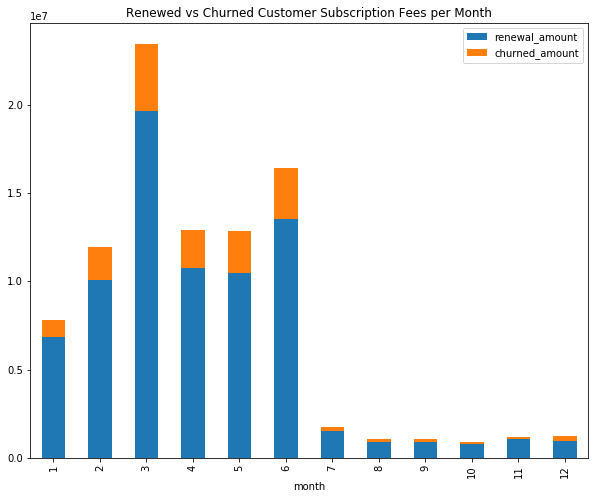

In [26]:
count_df[['renewal_amount', 'churned_amount']].plot.bar(
    stacked=True,
    figsize=(10,8),
    title='Renewed vs Churned Customer Subscription Fees per Month'
)

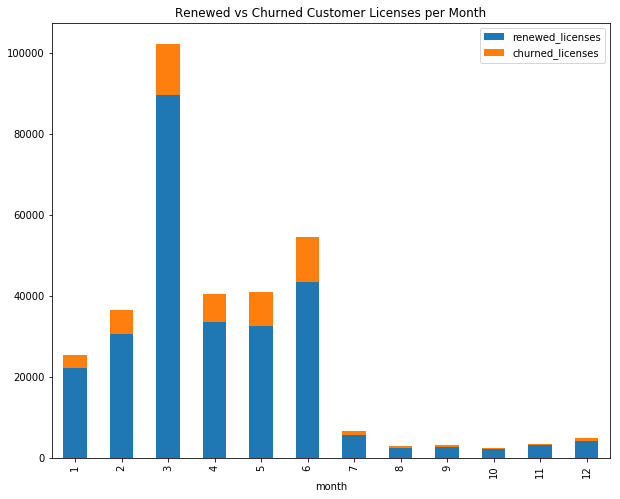

In [28]:
count_df[['renewed_licenses', 'churned_licenses']].plot.bar(
    stacked=True,
    figsize=(10,8),
    title='Renewed vs Churned Customer Licenses per Month'
)

## Churned Revenue

In [59]:
renew = df.loc[df.Renew_Status == 'RENEW']
churn = df.loc[df.Renew_Status == 'CHURN']
total = len(df)

churn_revenue = sum(churn.renewal_amount_due_usd)
renew_revenue = sum(renew.renewal_amount_due_usd)
total_revenue = sum(df.renewal_amount_due_usd)

churn_lic = sum(churn.licenses)
renew_lic = sum(renew.licenses)
total_lic = sum(df.licenses)


print("Total RENEW: {} [{:.3f}%]".format(len(renew), (len(renew) / total * 100.0)))
print("Total CHURN: {} [{:.3f}%]".format(len(churn), (len(churn) / total * 100.0)))

print("\n")
print("Total RENEW Revenue: {} [{:.3f}%]".format(renew_revenue, (renew_revenue / total_revenue * 100.0)))
print("Total CHURN Revenue: {} [{:.3f}%]".format(churn_revenue, (churn_revenue / total_revenue * 100.0)))

print("\n")
print("Total RENEW Licenses: {} [{:.3f}%]".format(renew_lic, (renew_lic / total_lic * 100.0)))
print("Total CHURN Licenses: {} [{:.3f}%]".format(churn_lic, (churn_lic / total_lic * 100.0)))

Total RENEW: 46718 [81.109%]
Total CHURN: 10881 [18.891%]


Total RENEW Revenue: 77465309.0 [83.660%]
Total CHURN Revenue: 15129985.0 [16.340%]


Total RENEW Licenses: 272676 [84.171%]
Total CHURN Licenses: 51278 [15.829%]


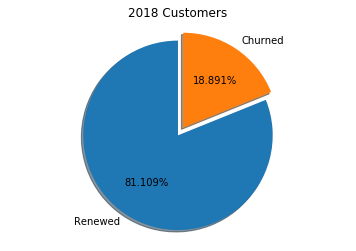

In [64]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Renewed', 'Churned']
sizes = [81.109, 18.891]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.3f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('2018 Customers')
plt.show()



## What do our Churners look like?

- markets
- channels
- num_licenses
- active users

In [31]:
df.iloc[0]

userid                                    605751
first_purchase_date                   2015-06-25
renewal_date                          2018-06-26
renewal_amount_due_usd                      4800
licenses                                      20
assigned_licenses                             52
market                                       ROW
billing_country                               US
billing_state                                 IN
channel                                  offline
total_meetings_30days                        620
total_meetings_30to60days                    364
meetingdays                                   31
total_participants                           386
webcam_duration                              368
audio_duration                           52220.5
Renew_Status                               RENEW
first_purchase_year                         2015
first_purchase_month                           6
renewal_month                                  6
renewal_year        

### Visualise usage 

In [5]:
df.describe()

,userid,renewal_amount_due_usd,licenses,assigned_licenses,total_meetings_30days,total_meetings_30to60days,meetingdays,total_participants,webcam_duration,audio_duration,first_purchase_year,first_purchase_month,renewal_month,renewal_year,years_active,renewal_amount_due_usd_per_license,total_usage_duration
count,5.759900e+04,57599.000000,57599.000000,57599.000000,57599.000000,57599.000000,57599.000000,57599.000000,57599.000000,5.759900e+04,57597.000000,57597.000000,57599.000000,57599.0,57597.000000,57599.000000,5.759900e+04
mean,3.217052e+18,1607.585097,5.624299,5.590062,35.761749,20.057935,6.478515,28.866699,153.263749,2.433775e+03,2014.628262,4.465094,4.207972,2018.0,3.371738,378.212861,2.587039e+03
std,3.063508e+18,6602.084268,118.624971,117.242721,556.820304,417.475586,7.524504,378.423050,1643.725805,3.148848e+04,1.987756,2.192594,1.346416,0.0,1.987756,119.252968,3.241541e+04
min,3.404000e+03,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2010.000000,1.000000,2.000000,2018.0,0.000000,10.666667,0.000000e+00
25%,7.807895e+05,348.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2013.000000,3.000000,3.000000,2018.0,2.000000,298.000000,0.000000e+00
50%,2.608880e+18,468.000000,1.000000,1.000000,4.000000,0.000000,3.000000,4.000000,0.000000,2.120000e+02,2015.000000,4.000000,4.000000,2018.0,3.000000,351.000000,2.350000e+02
75%,5.918540e+18,708.000000,2.000000,2.000000,17.000000,2.000000,11.000000,17.000000,0.000000,1.102865e+03,2016.000000,6.000000,5.000000,2018.0,5.000000,468.000000,1.211965e+03
max,9.222970e+18,849264.000000,27220.000000,25154.000000,119898.000000,92294.000000,31.000000,83192.000000,140688.470000,6.495909e+06,2018.000000,12.000000,6.000000,2018.0,8.000000,1813.000000,6.636597e+06


In [6]:
usage = list(churn.total_usage_duration)

(array([84.,  6.,  4.,  0.,  3.,  1.,  0.,  0.,  0.,  2.]),
 array([   1501.   ,  116483.239,  231465.478,  346447.717,  461429.956,
         576412.195,  691394.434,  806376.673,  921358.912, 1036341.151,
        1151323.39 ]),
 <a list of 10 Patch objects>)

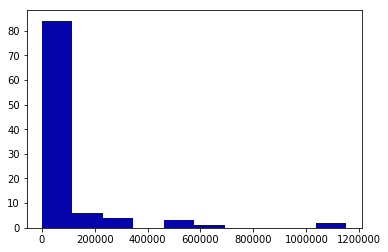

In [7]:
plt.hist(x=usage[:100], bins=10, color='#0504aa')

## Customer Revenue per Years Active 

- figure out how much of 2018's revenue came from our most loyal customers

In [85]:
years, cumu, revenue = [],[],[]

for yr in list(set(renew.dropna(subset=['first_purchase_year']).first_purchase_year)):
    total_years = 2018 - yr
    years.append(int(total_years))
    yr_df = renew.loc[renew.first_purchase_year == yr]
    
    greater_df = renew.loc[renew.first_purchase_year <= yr]
    
    greater_revenue = sum(greater_df.renewal_amount_due_usd)
    cumu.append(greater_revenue)

    total_revenue = sum(yr_df.renewal_amount_due_usd)
    revenue.append(total_revenue)
    

revenue_per_years_active = pd.DataFrame({
    'num_years': years,
    'revenue': revenue,
    'cumu_revenue': cumu
})

revenue_per_years_active = revenue_per_years_active.sort_values(by='num_years').reset_index(drop=True)
revenue_per_years_active = revenue_per_years_active.set_index('num_years')


In [93]:
list(set(renew.dropna(subset=['first_purchase_year']).first_purchase_year))

[2016.0, 2017.0, 2018.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]

In [162]:
sum(df.loc[df.first_purchase_year == 2010].renewal_amount_due_usd)

25319411.0

In [163]:
sum(renew.loc[renew.first_purchase_year == 2010].renewal_amount_due_usd)

22275154.0

In [86]:
revenue_per_years_active

,revenue,cumu_revenue
num_years,,
0,348.0,77453189.0
1,7210296.0,77452841.0
2,7813067.0,70242545.0
3,6951855.0,62429478.0
4,8909060.0,55477623.0
5,10430719.0,46568563.0
6,8981909.0,36137844.0
7,4880781.0,27155935.0
8,22275154.0,22275154.0


In [92]:
total_renew_revenue - sum(revenue_per_years_active.revenue)

12120.0

In [100]:
total_renew_revenue = sum(renew.dropna(subset=['first_purchase_year']).renewal_amount_due_usd)
print("${}".format(total_renew_revenue))

$77453189.0


In [138]:
cum_sum = []

tot = 0
for idx, row in revenue_per_years_active.iterrows():
    tot += row['revenue']
    cum_sum.append(tot) 

revenue_per_years_active['cumulative_revenue'] = cum_sum

In [144]:
revenue_per_years_active['proportion'] = revenue_per_years_active.revenue.apply(lambda x: x / total_renew_revenue * 100)
revenue_per_years_active['cumulative_proportion'] = revenue_per_years_active.cumulative_revenue.apply(lambda x: x / total_renew_revenue * 100)



In [145]:
revenue_per_years_active

,revenue,cumu_revenue,proportion,cumulative_proportion,cumulative_revenue
num_years,,,,,
0,348.0,77453189.0,0.000449,0.000449,348.0
1,7210296.0,77452841.0,9.309231,9.309680,7210644.0
2,7813067.0,70242545.0,10.087470,19.397150,15023711.0
3,6951855.0,62429478.0,8.975557,28.372707,21975566.0
4,8909060.0,55477623.0,11.502509,39.875215,30884626.0
5,10430719.0,46568563.0,13.467127,53.342342,41315345.0
6,8981909.0,36137844.0,11.596564,64.938907,50297254.0
7,4880781.0,27155935.0,6.301588,71.240495,55178035.0
8,22275154.0,22275154.0,28.759505,100.000000,77453189.0


In [103]:
revenue_per_years_active

,revenue,cumu_revenue,proportion,cumulative_proportion,cumulative_revenue
num_years,,,,,
0,348.0,77453189.0,0.000449,100.000000,77452841.0
1,7210296.0,77452841.0,9.309231,99.999551,70242545.0
2,7813067.0,70242545.0,10.087470,90.690320,62429478.0
3,6951855.0,62429478.0,8.975557,80.602850,55477623.0
4,8909060.0,55477623.0,11.502509,71.627293,46568563.0
5,10430719.0,46568563.0,13.467127,60.124785,36137844.0
6,8981909.0,36137844.0,11.596564,46.657658,27155935.0
7,4880781.0,27155935.0,6.301588,35.061093,22275154.0
8,22275154.0,22275154.0,28.759505,28.759505,0.0


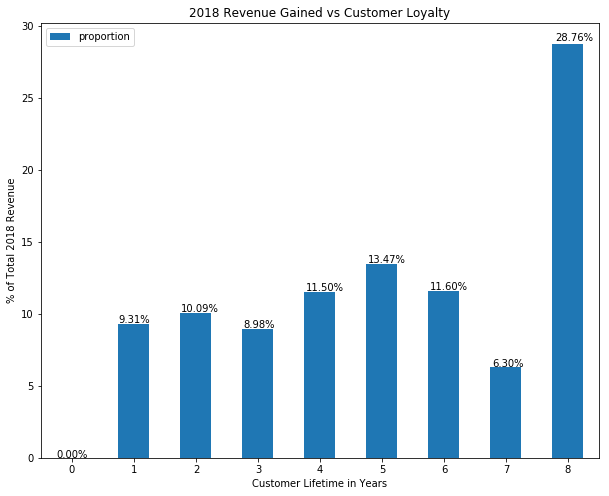

In [147]:
ax = revenue_per_years_active[['proportion']].plot.bar(
    figsize=(10,8),
    title='2018 Revenue Gained vs Customer Loyalty',
    rot=0
)

ax.set_ylabel("% of Total 2018 Revenue")
ax.set_xlabel("Customer Lifetime in Years")

for p, percent in zip(ax.patches, list(revenue_per_years_active.proportion)):
    ax.annotate("{:.2f}%".format(percent), (p.get_x() * 1.005, p.get_height() * 1.008))

In [135]:
list(revenue_per_years_active.index)


[0, 1, 2, 3, 4, 5, 6, 7, 8]

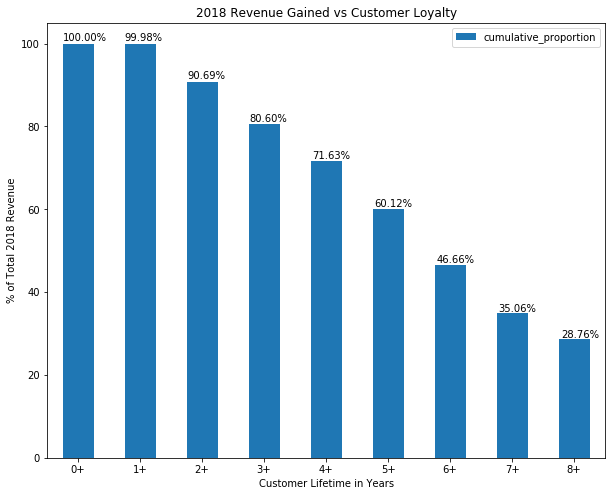

In [137]:
ax = revenue_per_years_active[['cumulative_proportion']].plot.bar(
    figsize=(10,8),
    title='2018 Revenue Gained vs Customer Loyalty'
)

ax.set_ylabel("% of Total 2018 Revenue")
ax.set_xlabel("Customer Lifetime in Years")
ax.set_xticklabels(["{}+".format(i) for i in list(revenue_per_years_active.index)], rotation=0)

for p, percent in zip(ax.patches, list(revenue_per_years_active.cumulative_proportion)):
    ax.annotate("{:.2f}%".format(percent), (p.get_x() * 1.005, p.get_height() * 1.008))

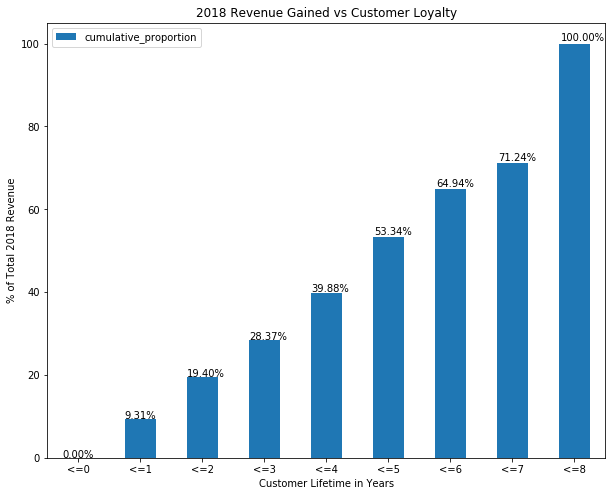

In [146]:
ax = revenue_per_years_active[['cumulative_proportion']].plot.bar(
    figsize=(10,8),
    title='2018 Revenue Gained vs Customer Loyalty'
)

ax.set_ylabel("% of Total 2018 Revenue")
ax.set_xlabel("Customer Lifetime in Years")
ax.set_xticklabels(["<={}".format(i) for i in list(revenue_per_years_active.index)], rotation=0)

for p, percent in zip(ax.patches, list(revenue_per_years_active.cumulative_proportion)):
    ax.annotate("{:.2f}%".format(percent), (p.get_x() * 1.005, p.get_height() * 1.008))

In [131]:
revenue_per_years_active.iloc[1]

revenue                  7.210296e+06
cumu_revenue             7.745284e+07
proportion               9.309231e+00
cumulative_proportion    9.998255e+01
cumulative_revenue       7.024254e+07
Name: 1, dtype: float64

In [16]:
churn.iloc[0]

userid                                    616421
first_purchase_date                   2013-06-27
renewal_date                          2018-06-14
renewal_amount_due_usd                     45900
licenses                                     900
assigned_licenses                           2235
market                                       ROW
billing_country                               US
billing_state                                 NY
channel                                  offline
total_meetings_30days                       5876
total_meetings_30to60days                   4201
meetingdays                                   31
total_participants                          3624
webcam_duration                             8150
audio_duration                            453506
Renew_Status                               CHURN
first_purchase_year                         2013
first_purchase_month                           6
renewal_month                                  6
renewal_year        

# Visualise Usage

- churner vs renewer

In [4]:
renew_avg_usage = sum(renew.total_usage_duration) / len(renew)

In [9]:
churn_avg_usage = sum(churn.total_usage_duration) / len(churn)

In [14]:
df = pd.DataFrame({'average_usage': [renew_avg_usage, churn_avg_usage]})

In [15]:
df

,average_usage
0,2779.355373
1,1761.321264


In [11]:
df

,renew_average_usage,churn_average_usage
0,2779.355373,1761.321264


[Text(0, 0, 'Renewed'), Text(0, 0, 'Churned')]

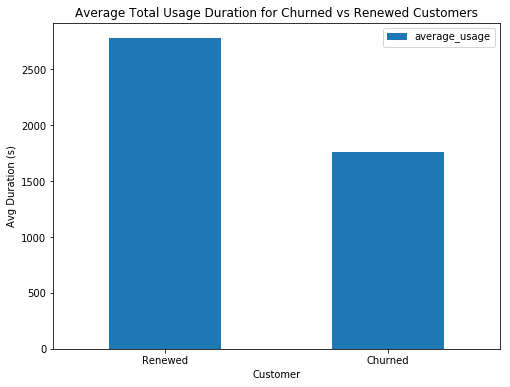

In [19]:
ax = df.plot.bar(
    figsize=(8,6),
    title='Average Total Usage Duration for Churned vs Renewed Customers'
)

ax.set_ylabel("Avg Duration (s)")
ax.set_xlabel("Customer")
ax.set_xticklabels(["Renewed", "Churned"], rotation=0)
